--- Step 1: Loading and Preparing Data ---
Successfully loaded 'advertising.csv'.

Data head after introducing missing values:
      TV  Radio  Newspaper  Sales
0  230.1   37.8        NaN   22.1
1   44.5    NaN       45.1   10.4
2   17.2   45.9       69.3   12.0
3    NaN   41.3       58.5   16.5
4  180.8   10.8        NaN   17.9

Missing values per column:
TV           30
Radio        30
Newspaper    30
Sales         0
dtype: int64
--------------------------------------------------

--- Step 2: Visualizing the Data ---
Generating Pairplot...


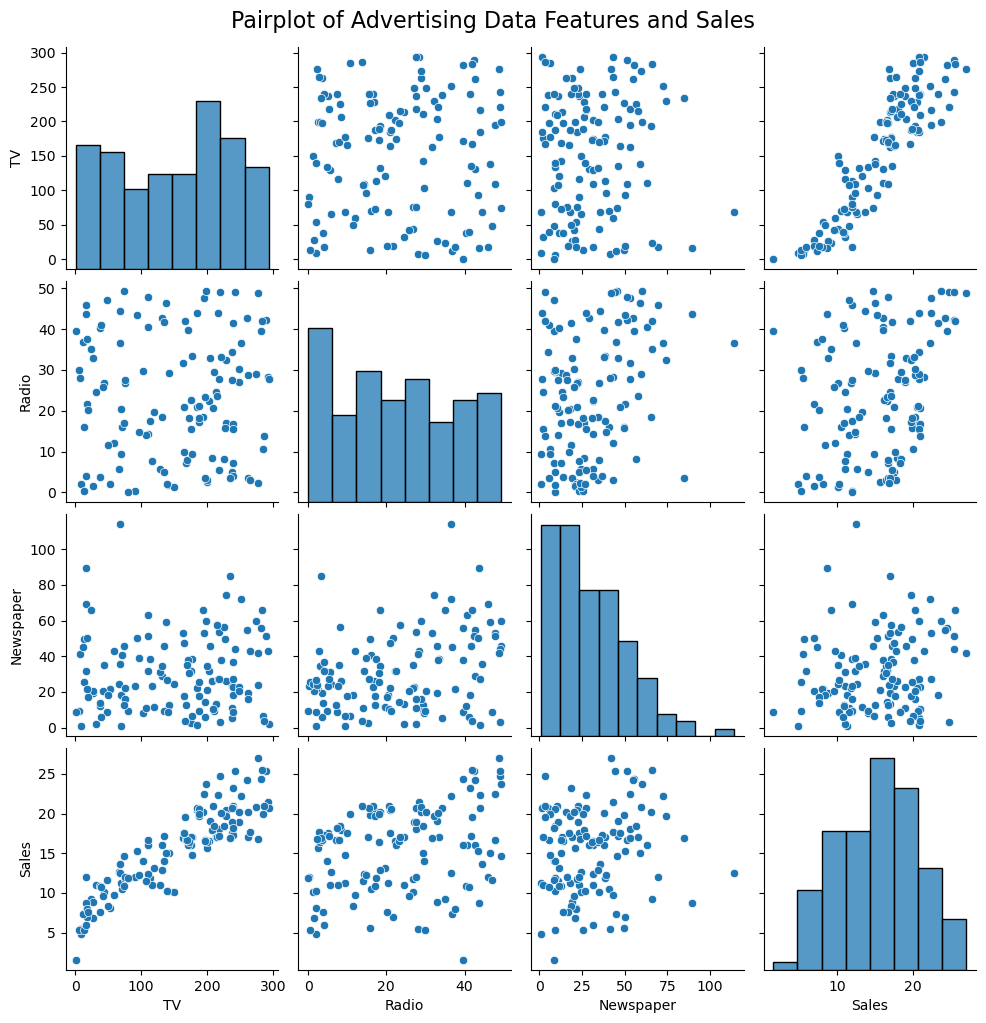

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


print("--- Step 1: Loading and Preparing Data ---")
try:
    df_original = pd.read_csv('advertising.csv')
    print("Successfully loaded 'advertising.csv'.")
except FileNotFoundError:
    print("ERROR: Make sure 'advertising.csv' is in the same directory.")
    exit()


df = df_original.copy()
for col in ['TV', 'Radio', 'Newspaper']:
   
    num_nans = int(0.15 * len(df))
    nan_indices = random.sample(range(len(df)), num_nans)
    df.loc[nan_indices, col] = np.nan

print("\nData head after introducing missing values:")
print(df.head())
print("\nMissing values per column:")
print(df.isnull().sum())
print("-" * 50 + "\n")



print("--- Step 2: Visualizing the Data ---")


df_for_plotting = df.dropna()

# 2.1: Pairplot for an overview of relationships
print("Generating Pairplot...")
sns.pairplot(df_for_plotting)
plt.suptitle('Pairplot of Advertising Data Features and Sales', y=1.02, fontsize=16)
plt.show()


Generating Boxplots for Outlier Detection...


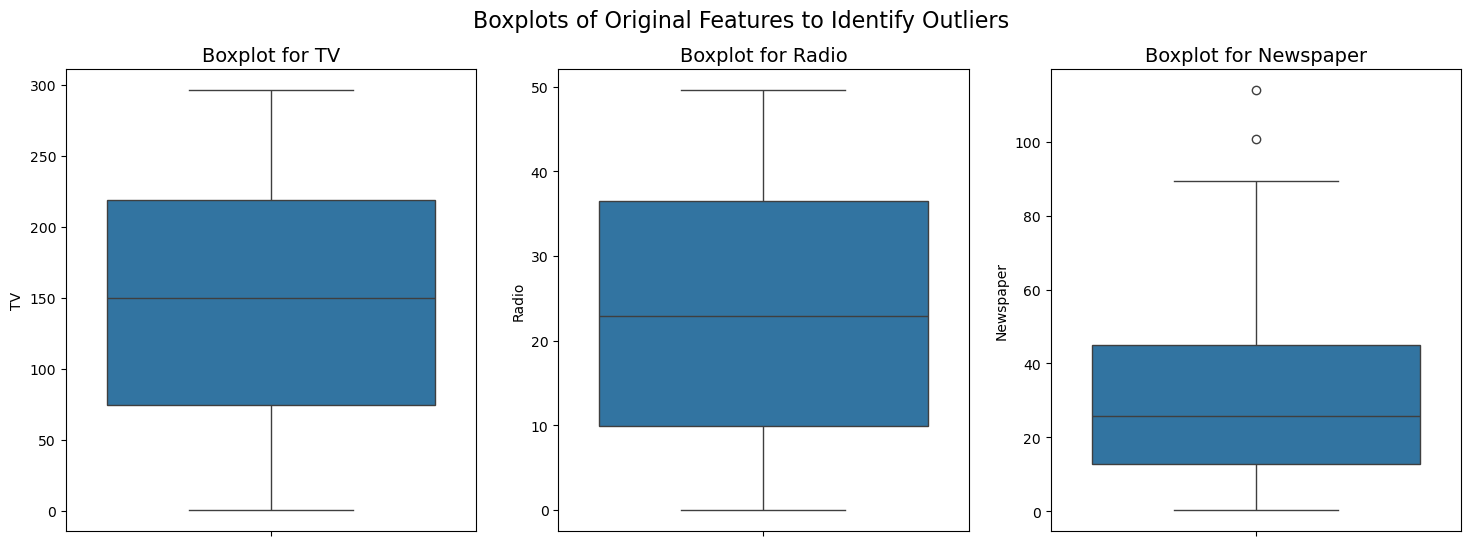

In [ ]:

print("\nGenerating Boxplots for Outlier Detection...")
# We use the original dataframe here to see the true outlier distribution
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(y=df_original['TV'], ax=axs[0]).set_title('Boxplot for TV', fontsize=14)
sns.boxplot(y=df_original['Radio'], ax=axs[1]).set_title('Boxplot for Radio', fontsize=14)
sns.boxplot(y=df_original['Newspaper'], ax=axs[2]).set_title('Boxplot for Newspaper', fontsize=14)
plt.suptitle('Boxplots of Original Features to Identify Outliers', fontsize=16)
plt.show()

--- Step 3: Defining All Functions from Scratch ---
All from-scratch functions have been defined.
--------------------------------------------------

--- Step 4: Running Experiment to Find Best Preprocessing Strategy ---
Tested -> Imp: Mean, Scale: MinMax, LR: 0.01, Iters: 2000, R-Squared: 0.6971
Tested -> Imp: Mean, Scale: Standard, LR: 0.01, Iters: 2000, R-Squared: 0.7377
Tested -> Imp: Mean, Scale: None, LR: 1e-07, Iters: 100000, R-Squared: 0.6774

Best combination found: {'Imputation': 'Mean', 'Scaling': 'Standard'} with R-Squared=0.7377
--------------------------------------------------

--- Step 5: Testing if Outlier Removal Improves the Best Model ---
Identified and removed 2 outliers in column 'Newspaper'.

Best Config R-Squared (with outliers):   0.8808
Best Config R-Squared (without outliers): 0.9365
[CONCLUSION]: Yes, removing outliers improved the model's performance.
--------------------------------------------------

--- Step 6: Generating Final Comparison Plot ---
NaNs i

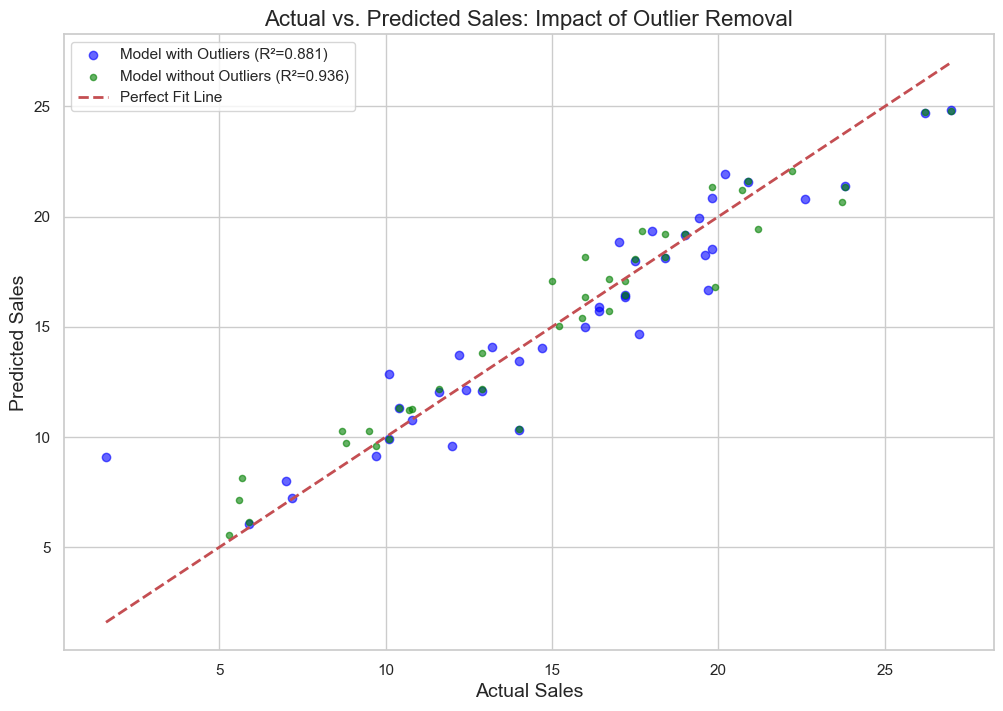

In [ ]:

print("--- Step 3: Defining All Functions from Scratch ---")

def impute_with_mean(data_series):
    mean_val = data_series.sum() / data_series.notna().sum()
    return data_series.fillna(mean_val)

def impute_with_median(data_series):
    sorted_series = data_series.dropna().sort_values().reset_index(drop=True)
    n = len(sorted_series)
    median_val = (sorted_series[n//2 - 1] + sorted_series[n//2]) / 2 if n % 2 == 0 else sorted_series[n//2]
    return data_series.fillna(median_val)

def impute_with_zero(data_series):
    return data_series.fillna(0)

def min_max_scaler(data_series):
    min_val, max_val = data_series.min(), data_series.max()
    if max_val - min_val == 0: return data_series.apply(lambda x: 0.0), min_val, max_val
    return (data_series - min_val) / (max_val - min_val), min_val, max_val

def standard_scaler(data_series):
    mean_val, std_val = data_series.mean(), data_series.std()
    if std_val == 0: return data_series.apply(lambda x: 0.0), mean_val, std_val
    return (data_series - mean_val) / std_val, mean_val, std_val

def apply_min_max_transform(data_series, min_val, max_val):
    if max_val - min_val == 0: return data_series.apply(lambda x: 0.0)
    return (data_series - min_val) / (max_val - min_val)

def apply_standard_transform(data_series, mean_val, std_val):
    if std_val == 0: return data_series.apply(lambda x: 0.0)
    return (data_series - mean_val) / std_val

def detect_and_remove_outliers_iqr(dataframe, feature_cols):
    df_out = dataframe.copy()
    for col in feature_cols:
        Q1, Q3 = df_out[col].quantile(0.25), df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        outlier_indices = df_out[(df_out[col] < lower_bound) | (df_out[col] > upper_bound)].index
        if not outlier_indices.empty:
            print(f"Identified and removed {len(outlier_indices)} outliers in column '{col}'.")
            df_out = df_out.drop(outlier_indices)
    return df_out

def train_test_split_scratch(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_idx = int(X.shape[0] * (1 - test_size))
    train_indices, test_indices = indices[:split_idx], indices[split_idx:]
    return X.iloc[train_indices], X.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices]

def r_squared_scratch(y_true, y_pred):
    if np.isnan(y_pred).any(): return -np.inf 
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    if ss_total == 0: return 1.0
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

class ScratchLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=2000):
        self.lr, self.n_iters = learning_rate, n_iterations
        self.weights, self.bias = None, None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            
            if np.isinf(dw).any() or np.isinf(db):
                print("Warning: Gradient overflow detected. Stopping training.")
                break 

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

print("All from-scratch functions have been defined.")
print("-" * 50 + "\n")



print("--- Step 4: Running Experiment to Find Best Preprocessing Strategy ---")

features = ['TV', 'Radio', 'Newspaper']
target = 'Sales'
X = df[features]
y = df[target]

imputation_methods = {'Mean': impute_with_mean} 
scaling_methods = {'MinMax': min_max_scaler, 'Standard': standard_scaler, 'None': None}

results = []
best_result = {'R-Squared': -np.inf, 'Config': {}}

for imp_name, imp_func in imputation_methods.items():
    for scale_name, scaler_func in scaling_methods.items():
        X_imputed = X.copy()
        for col in features:
            X_imputed[col] = imp_func(X_imputed[col])
        
        X_train, X_test, y_train, y_test = train_test_split_scratch(X_imputed, y, random_state=42)
        
       
        if scale_name == 'None':
            current_lr = 1e-7  # Very small LR for unscaled data
            current_iters = 100000 # Needs many more iterations to learn
        else:
            current_lr = 0.01   # Larger LR for scaled data
            current_iters = 2000  # Standard iterations
            
            # Apply scaling
            X_train, X_test = X_train.copy(), X_test.copy()
            for col in features:
                scaled_train_col, p1, p2 = scaler_func(X_train[col])
                X_train[col] = scaled_train_col
                X_test[col] = apply_min_max_transform(X_test[col], p1, p2) if scale_name == 'MinMax' else apply_standard_transform(X_test[col], p1, p2)
        
        model = ScratchLinearRegression(learning_rate=current_lr, n_iterations=current_iters)
        model.fit(X_train.to_numpy(), y_train.to_numpy())
        predictions = model.predict(X_test.to_numpy())
        
        r2 = r_squared_scratch(y_test.to_numpy(), predictions)
        
        print(f"Tested -> Imp: {imp_name}, Scale: {scale_name}, LR: {current_lr}, Iters: {current_iters}, R-Squared: {r2:.4f}")

        if r2 > best_result['R-Squared']:
            best_result['R-Squared'] = r2
            best_result['Config'] = {'Imputation': imp_name, 'Scaling': scale_name}

print(f"\nBest combination found: {best_result['Config']} with R-Squared={best_result['R-Squared']:.4f}")
print("-" * 50 + "\n")


print("--- Step 5: Testing if Outlier Removal Improves the Best Model ---")

best_config = best_result['Config']
best_imp_func = imputation_methods[best_config['Imputation']]
best_scaler_info = scaling_methods.get(best_config['Scaling'])



def train_and_evaluate(dataframe, scaler_info):
   
    X = dataframe[features].copy() 
    y = dataframe[target]
    
   
    for col in features:
    
        X[col] = best_imp_func(X[col])

    X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, random_state=42)
    
    if scaler_info:
        lr, iters = 0.01, 2000
        scaler_func = scaler_info
        X_train, X_test = X_train.copy(), X_test.copy()
        for col in features:
            scaled_train_col, p1, p2 = scaler_func(X_train[col])
            X_train[col] = scaled_train_col
            X_test[col] = apply_min_max_transform(X_test[col], p1, p2) if best_config['Scaling'] == 'MinMax' else apply_standard_transform(X_test[col], p1, p2)
    else: # No scaling
        lr, iters = 1e-7, 100000

    model = ScratchLinearRegression(learning_rate=lr, n_iterations=iters)
    model.fit(X_train.to_numpy(), y_train.to_numpy())
    predictions = model.predict(X_test.to_numpy())
    
    return y_test.to_numpy(), predictions
# Train on data WITH outliers
y_test_with, preds_with = train_and_evaluate(df_original.copy(), best_scaler_info)
r2_with_outliers = r_squared_scratch(y_test_with, preds_with)

# Train on data WITHOUT outliers
df_no_outliers = detect_and_remove_outliers_iqr(df_original.copy(), features)
y_test_no, preds_no = train_and_evaluate(df_no_outliers, best_scaler_info)
r2_no_outliers = r_squared_scratch(y_test_no, preds_no)

print(f"\nBest Config R-Squared (with outliers):   {r2_with_outliers:.4f}")
print(f"Best Config R-Squared (without outliers): {r2_no_outliers:.4f}")
if r2_no_outliers > r2_with_outliers:
    print("[CONCLUSION]: Yes, removing outliers improved the model's performance.")
else:
    print("[CONCLUSION]: No, removing outliers did not improve the model's performance.")
print("-" * 50 + "\n")


# --- Step 6: Final Visualization with Debugging ---
print("--- Step 6: Generating Final Comparison Plot ---")



# Create dataframes from the test results to easily find common data
df_with = pd.DataFrame({'y_true': y_test_with, 'y_pred': preds_with})
df_no = pd.DataFrame({'y_true': y_test_no, 'y_pred': preds_no})


print(f"NaNs in 'with outliers' predictions: {np.isnan(df_with['y_pred']).sum()}")
print(f"NaNs in 'no outliers' predictions:   {np.isnan(df_no['y_pred']).sum()}")


try:
    plt.figure(figsize=(12, 8))
    plt.scatter(df_with['y_true'], df_with['y_pred'], alpha=0.6, c='blue', label=f'Model with Outliers (R²={r2_with_outliers:.3f})')
    plt.scatter(df_no['y_true'], df_no['y_pred'], alpha=0.6, c='green', s=20, label=f'Model without Outliers (R²={r2_no_outliers:.3f})')
    
    # Determine plot limits to draw the perfect fit line
    all_vals = np.concatenate([df_with['y_true'], df_with['y_pred'], df_no['y_true'], df_no['y_pred']])
    all_vals = all_vals[~np.isnan(all_vals)] # Remove any potential NaNs for limit calculation
    min_val, max_val = all_vals.min(), all_vals.max()

    plt.plot([min_val, max_val], [min_val, max_val], '--r', linewidth=2, label='Perfect Fit Line')
    plt.xlabel('Actual Sales', fontsize=14)
    plt.ylabel('Predicted Sales', fontsize=14)
    plt.title('Actual vs. Predicted Sales: Impact of Outlier Removal', fontsize=16)
    plt.legend()
    plt.grid(True)
    print("\nPlot generated successfully. Displaying now...")
    plt.show()

except Exception as e:
    print(f"\nAn error occurred during plotting: {e}")
    print("This usually happens if one of the models failed to train and produced invalid predictions.")